# STAT 208 Final Project Code
## Customer Segmentation Analysis


### Information:
For detail, please refer to our [GitHub](https://github.com/Jen-uis/STAT208_Team8) page.
  

  
### Contact:
This Project Code is subject to the team as:
- Nathaniel Zhu
- Xujuan Liang
- Xiaoya Wei
- Youyi Fu

In [57]:
# Loading Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

## Part I: Pre-analysis of the Data

In [2]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [3]:
# Show basic information about the datasets
print("Train Dataset Info:")
print(train_data.info())
print("\nTest Dataset Info:")
print(test_data.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -----------

In [4]:
# Summary statistics for numerical features
print("\nSummary Statistics for Train Dataset:")
print(train_data.describe())

# Summary statistics for numerical features in test dataset
print("\nSummary Statistics for Test Dataset:")
print(test_data.describe())


Summary Statistics for Train Dataset:
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.406763     1.531413
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000

Summary Statistics for Test Dataset:
                  ID          Age  Work_Experience  Family_Size
count    2627.000000  2627.000000      2358.000000  2514.000000
mean   463433.918919    43.649791         2.552587     2.825378
std      2618.245698    16.967015         3.341094     1.551906
min    458989.000000    18.000000         0.000000     1.000000
25%    461162.500000    30.

In [5]:
# Count of missing values per column
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())

# Count of missing values per column in test dataset
print("\nMissing Values in Test Dataset:")
print(test_data.isnull().sum())


Missing Values in Train Dataset:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Missing Values in Test Dataset:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [6]:
# Printing head data
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Part II: Desctiptive Analysis

### Graph 1: Age Distribution of Customer

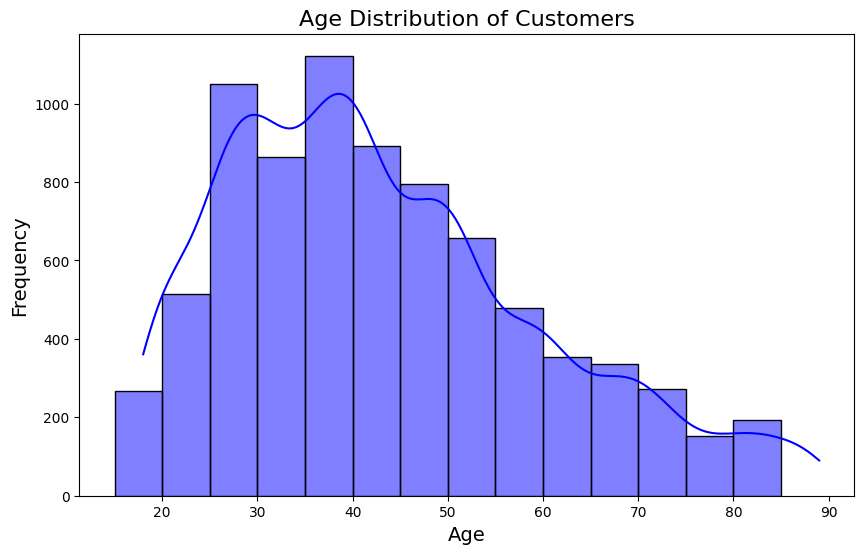

In [7]:
# Age Distribution Visualization

plt.figure(figsize = (10, 6))
sns.histplot(train_data['Age'], bins = list(range(15,90,5)), kde = True, color = 'blue')

plt.title('Age Distribution of Customers', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.show()

### Graph 2: Gender Distribution

In [8]:
# Gender Data preparation
gender = train_data.groupby('Gender').count().reset_index()[['Gender','Age']]
gender.rename(columns = {'Age':'Count'}, inplace = True)
gender

,Gender,Count
0,Female,3651
1,Male,4417


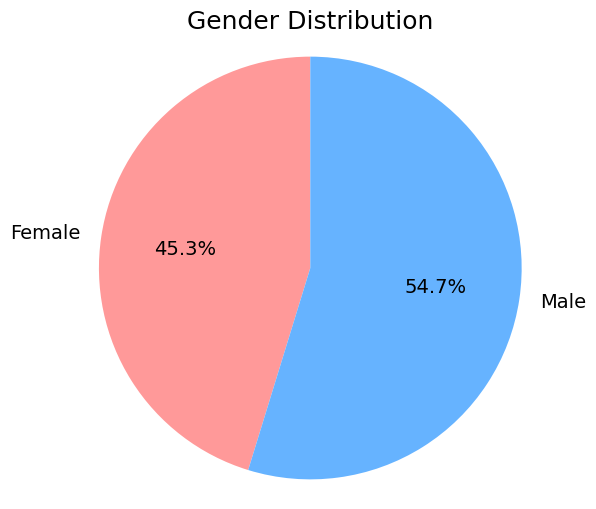

In [9]:
# Gender Segmentation Visualization
plt.figure(figsize = (6, 6))
colors = ['#ff9999','#66b3ff']
plt.pie(gender['Count'], labels = gender['Gender'], autopct = '%1.1f%%', startangle = 90, colors = colors, textprops = {'fontsize': 14})

plt.title('Gender Distribution', fontsize = 18)

plt.axis('equal')

plt.show()

### Graph 3: Spending Power by Profession

In [10]:
# Spending Power Data preparation, transfer spending_score into numbers
mapping = {'Low': 1, 'Average': 2, 'High': 3}
train_data['Numeric_spending'] = train_data['Spending_Score'].map(mapping)
train_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Numeric_spending
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,2
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,3
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,3


In [11]:
# Spending Power Data preparation, Final step
Spending_bypro = train_data.groupby('Profession').sum('Numeric_spending').reset_index().sort_values('Numeric_spending', ascending = False)[['Profession', 'Numeric_spending']]
Spending_bypro

,Profession,Numeric_spending
0,Artist,4011
4,Executive,1470
5,Healthcare,1464
3,Entertainment,1360
7,Lawyer,1289
2,Engineer,1040
1,Doctor,927
8,Marketing,375
6,Homemaker,358


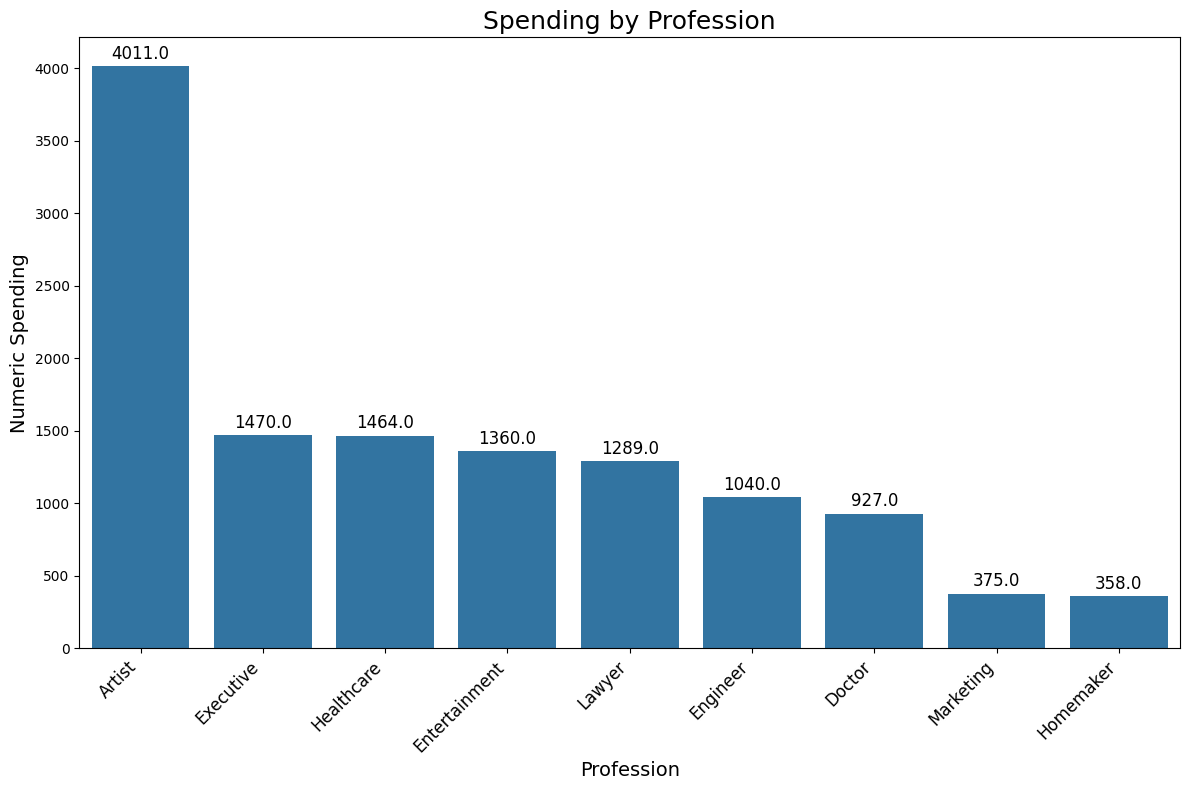

In [12]:
# Spending Power Visualization
plt.figure(figsize = (12, 8))
bar_plot = sns.barplot(x = 'Profession', y = 'Numeric_spending', data = Spending_bypro)

plt.title('Spending by Profession', fontsize = 18)
plt.xlabel('Profession', fontsize = 14)
plt.ylabel('Numeric Spending', fontsize = 14)

plt.xticks(rotation = 45, ha='right', fontsize = 12)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=12)

# Showing Plots
plt.tight_layout()
plt.show()

### Graph 4: Spending by Gender

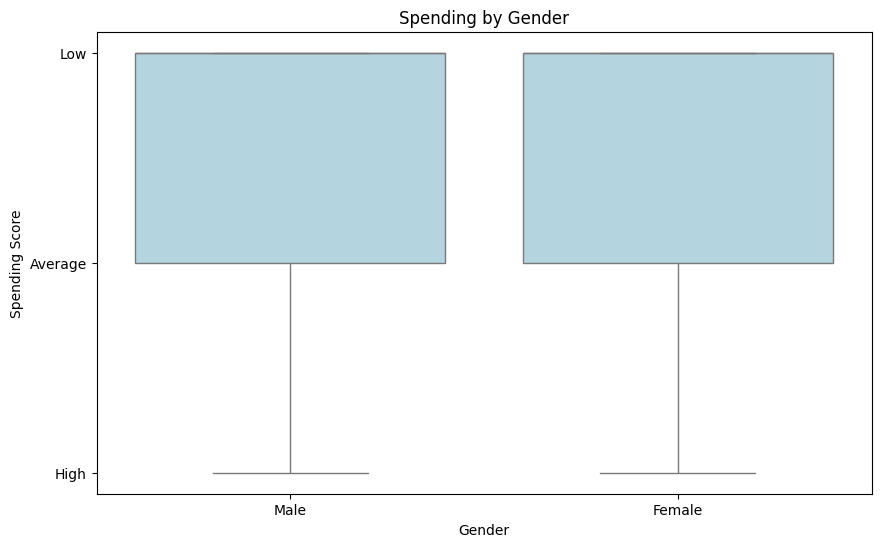

In [13]:
# Create the boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(x='Gender', y='Spending_Score', data=train_data, color = "lightblue")
plt.title('Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

### Graph 5: Spending by Segments

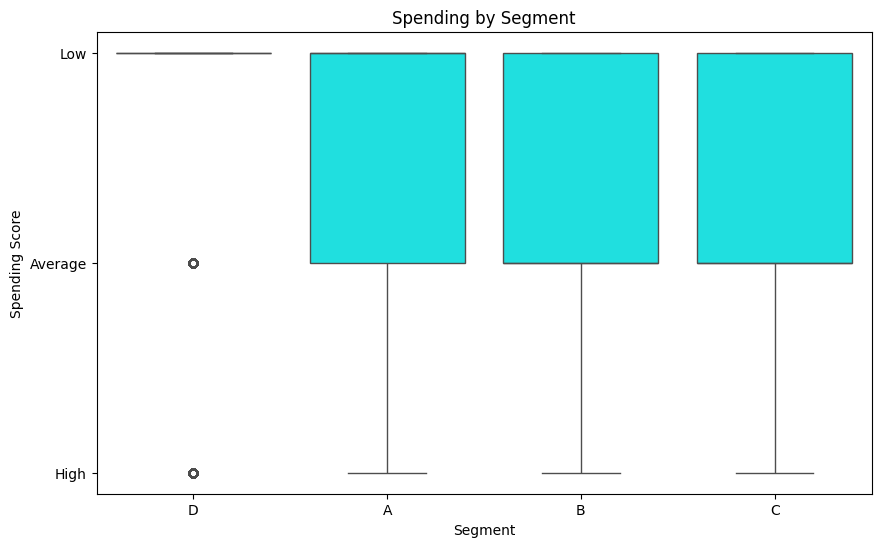

In [14]:
# Create the boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Segmentation', y = 'Spending_Score', data=train_data, color = "cyan")
plt.title('Spending by Segment')
plt.xlabel('Segment')
plt.ylabel('Spending Score')
plt.show()

### Graph 6: Correlation Matrix

We aim to create a correlation matrix of this dataset, however, there are a lot of categorical values in the dataset. Let us use LabelEncoder first before accessing the correlation matrix.

In [15]:
# Create a label encoder objects
label_encoder = LabelEncoder()

# List of Categorical values in the data
categorical_columns = [
    'Gender',
    'Ever_Married',
    'Graduated',
    'Profession',
    'Spending_Score',
    'Var_1',
    'Segmentation'
]

# Create a new dataframe to store data
numerical_train = train_data.copy().drop(columns = ['Numeric_spending'])

# Apply label encoding to each categorical columns
for column in categorical_columns:
    numerical_train[column] = label_encoder.fit_transform(numerical_train[column].astype(str))
    
# Check the results
numerical_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
1,462643,0,1,38,1,2,NaN,0,3.0,3,0
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,NaN,1,6.0,5,0


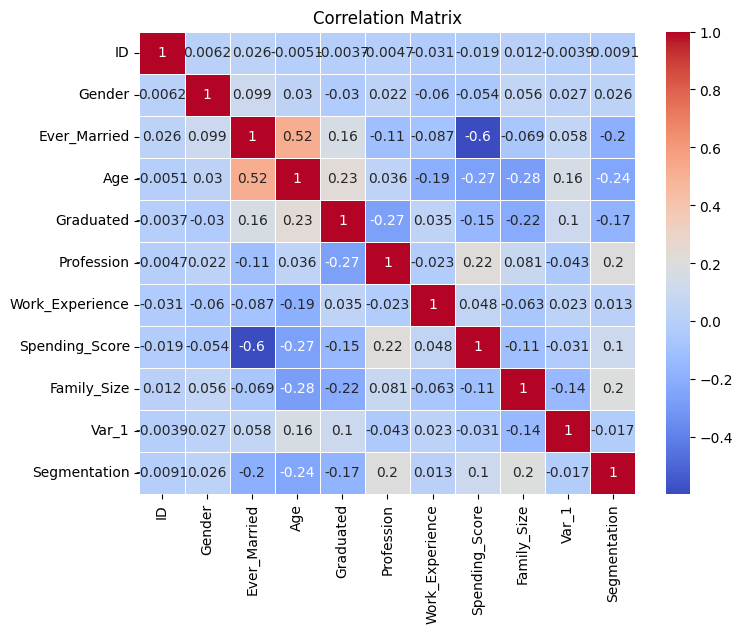

In [16]:
# Correlation Matrix Visualization
plt.figure(figsize = (8, 6))
corr_matrix = numerical_train.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

### Graph 7: Spending Score Distribution

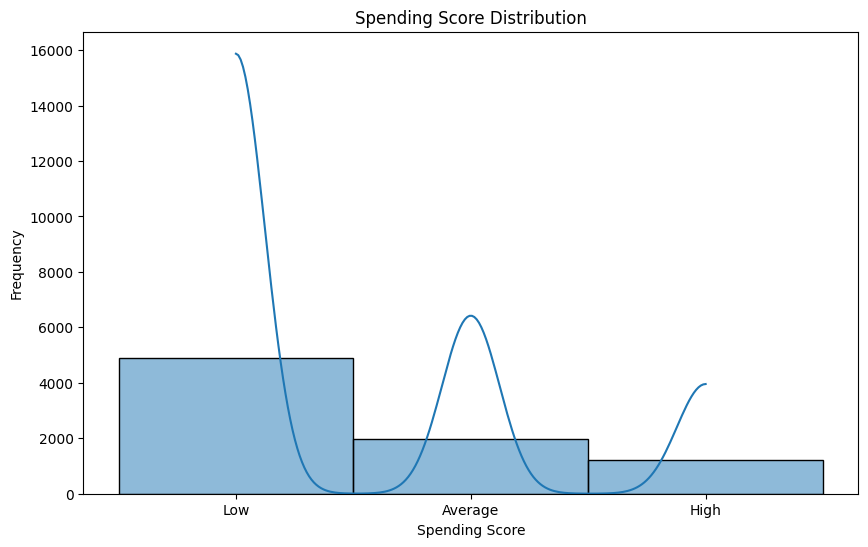

In [17]:
# Visualization
plt.figure(figsize = (10, 6))
sns.histplot(train_data['Spending_Score'], bins  =20, kde = True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

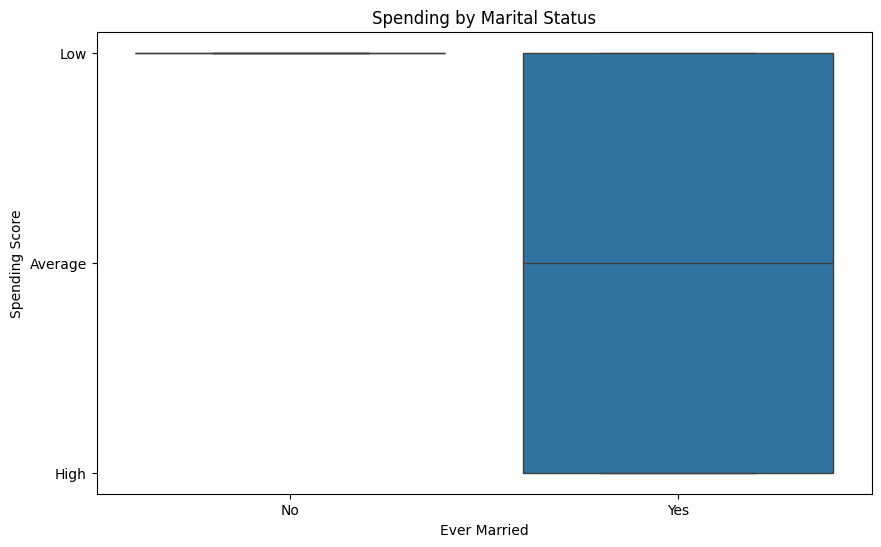

In [18]:
# Marital Status and Spending
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Ever_Married', y = 'Spending_Score', data = train_data)
plt.title('Spending by Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Spending Score')
plt.show()

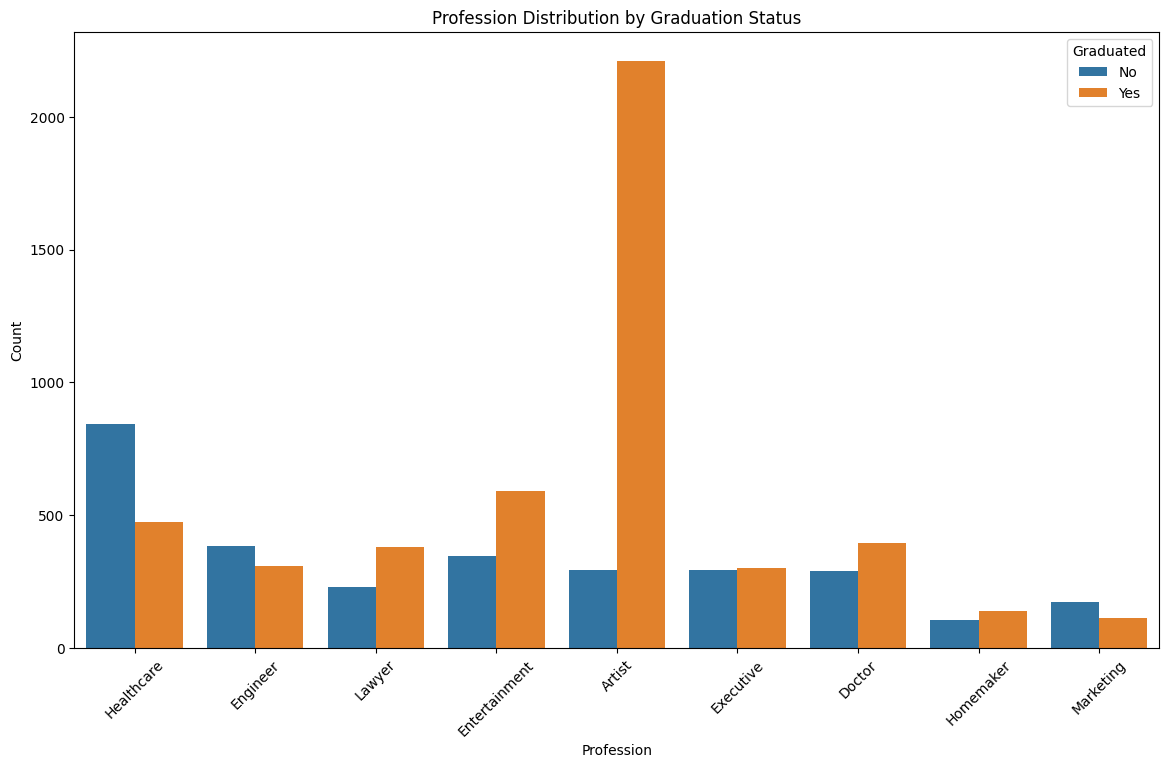

In [19]:
# Graduation Status and Profession
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Profession', hue = 'Graduated', data = train_data)
plt.title('Profession Distribution by Graduation Status')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

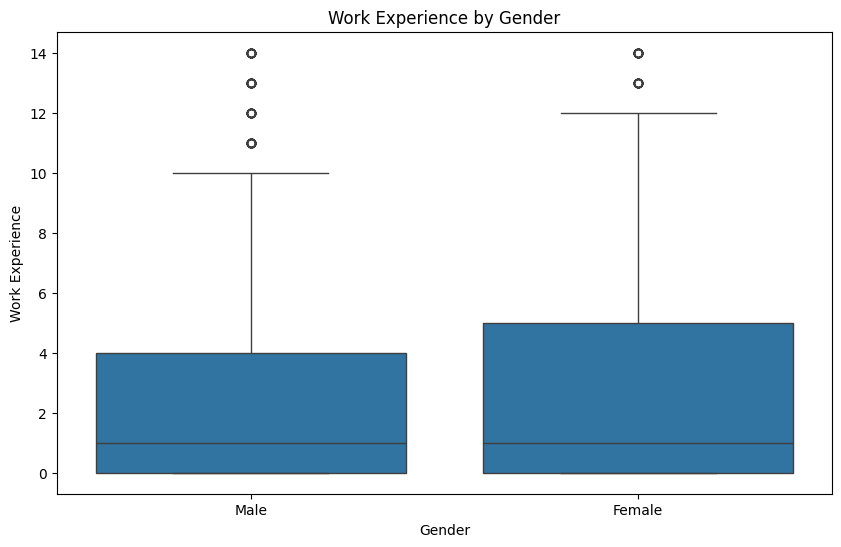

In [20]:
# Work Experience Analysis
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Gender', y = 'Work_Experience', data = train_data)
plt.title('Work Experience by Gender')
plt.xlabel('Gender')
plt.ylabel('Work Experience')
plt.show()

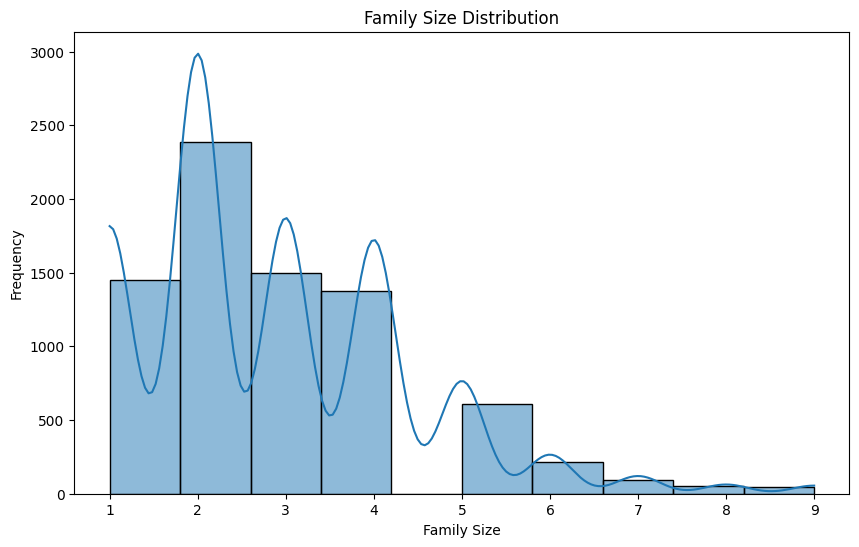

In [21]:
# Family Size Analysis
plt.figure(figsize = (10, 6))
sns.histplot(train_data['Family_Size'], bins = 10, kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

## Part III: Modeling

Analysis:  
Throughout this part in Modeling, we will be mainly focuses in these areas:
1. Predictive Modeling for Spending Scores
    - Preferrably Linear Regression as we will transform Spending_Score to numerical
    - Decision Trees/Random Forest
    - Gradient Boosting Machines
    - Support Vector Machines
2. Customer Segmentation
    - Create new segments of customers based on clustering
    - For example: K-Means Clustering / Hierarchical Clustering
3. Customer Lifetime Value Prediction
    - Predict the future value a customer will bring to the company
    - For example: Regression Models / Survival Analysis
4. Feature Importance Analysis
    - Identify which features are most important in predicting the target values, like Spending_score
    - For example: Random Forest / Gradient Boosting

In [67]:
# Drop N/As in numerical_train
numerical_train = numerical_train.dropna()

# Define dependent and independent variables (or features and target)
X_train = numerical_train.drop(columns = ['Spending_Score', 'Segmentation'])
Y_train = numerical_train['Spending_Score']

# Convert test_data into numerical data as well
numerical_test = test_data.copy() # first copy
numerical_test = numerical_test.dropna() # then drop N/As

# Create the categorical columns for test now,
# since it does not have 'Segmentation'
categorical_columns_test = [
    'Gender',
    'Ever_Married',
    'Graduated',
    'Profession',
    'Var_1',
    'Spending_Score'
]

# Label Encodering
for column in categorical_columns_test:
    numerical_test[column] = label_encoder.fit_transform(numerical_test[column].astype(str))

# Define dep and indep vars again
X_test = numerical_test.drop(columns = ['Spending_Score'])
Y_test = numerical_test['Spending_Score']

### Linear Regression Model:

In [82]:
# Start and train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.4f}')

Linear Regression MSE: 0.4084


### Decision Tree Regressor

In [83]:
# Start and train the Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state = 208)
dt_model.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = dt_model.predict(X_test)

# Evaluate model
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
print(f'Decision Tree Regressor MSE: {mse_dt:.4f}')

Decision Tree Regressor MSE: 0.3245


### Random Forest Regressor

In [84]:
# Start and train
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 208)
rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(f'Random Forest Regressor MSE: {mse_rf:.4f}')

Random Forest Regressor MSE: 0.1710


### Gradient Boosting Regressor

In [85]:
# Start and train
gbm_model = GradientBoostingRegressor(n_estimators = 100, random_state = 208)
gbm_model.fit(X_train, Y_train)

# Make predictions
Y_pred_gbm = gbm_model.predict(X_test)

# Evaluate Model
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
print(f'Gradient Boosting Regressor MSE: {mse_gbm:.4f}')

Gradient Boosting Regressor MSE: 0.2897


### Support Vector Regressor

In [86]:
# Start and train
svr_model = SVR()
svr_model.fit(X_train, Y_train)

# Make predictions
Y_pred_svr = svr_model.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(Y_test, Y_pred_svr)
print(f'Support Vector Regressor MSE: {mse_svr:.4f}')

Support Vector Regressor MSE: 0.9947


In [87]:
# Create Model Performance
mse_performance_summary = {
    'Model': [
        'Linear Regression',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Support Vector Regressor'
    ],
    'MSE': [
        mse_lr,
        mse_dt,
        mse_rf,
        mse_gbm,
        mse_svr
    ]
}

performance_df = pd.DataFrame(mse_performance_summary)
performance_df

,Model,MSE
0,Linear Regression,0.408419
1,Decision Tree Regressor,0.324513
2,Random Forest Regressor,0.171008
3,Gradient Boosting Regressor,0.289747
4,Support Vector Regressor,0.994738
